#### 데이터 가져오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/focus/Study_For_DeepLearning/data

/content/drive/MyDrive/focus/Study_For_DeepLearning/data


In [3]:
!ls

test_set  training_set


In [ ]:
# !unzip -qq training_set.zip
# !unzip -qq test_set.zip

In [4]:
import os
import numpy as np
import pandas as pd

In [5]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/focus/Study_For_DeepLearning/data'):
  for filename in filenames:
    os.path.join(dirname, filename)

### 메타 데이터 전처리

In [6]:
# 절대경로
path = []
# train & test data
dataset_gubuns = []
# dog인지 cat인지 구분
labels_gubuns = []

for dirname, _, filenames in os.walk('/content/drive/MyDrive/focus/Study_For_DeepLearning/data'):
  for filename in filenames:
    if '.jpg' in filename:
      file_path = dirname+'/'+filename
      path.append(file_path)

      if '/training_set/' in file_path:
        dataset_gubuns.append('train')
      elif '/test_set/' in file_path:
        dataset_gubuns.append('test')
      else: dataset_gubuns.append('N/A')

      if 'dogs' in file_path:
        labels_gubuns.append('DOG')
      elif 'cats' in file_path:
        labels_gubuns.append('CAT')
      else: labels_gubuns.append('N/A')
    

In [7]:
path[:5] , dataset_gubuns[:5], labels_gubuns[:5]

(['/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set/dogs/dog.4830.jpg',
  '/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set/dogs/dog.4429.jpg',
  '/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set/dogs/dog.4617.jpg',
  '/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set/dogs/dog.4159.jpg',
  '/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set/dogs/dog.4165.jpg'],
 ['test', 'test', 'test', 'test', 'test'],
 ['DOG', 'DOG', 'DOG', 'DOG', 'DOG'])

In [8]:
pd.set_option('display.max_colwidth', 200)
df = pd.DataFrame({
    'path': path,
    'dataset': dataset_gubuns,
    'label': labels_gubuns
})
print('df shape: ', df.shape)
df.head(10)

df shape:  (10028, 3)


,path,dataset,label
0,/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set/dogs/dog.4830.jpg,test,DOG
1,/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set/dogs/dog.4429.jpg,test,DOG
2,/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set/dogs/dog.4617.jpg,test,DOG
3,/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set/dogs/dog.4159.jpg,test,DOG
4,/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set/dogs/dog.4165.jpg,test,DOG
5,/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set/dogs/dog.4171.jpg,test,DOG
6,/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set/dogs/dog.4373.jpg,test,DOG
7,/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set/dogs/dog.4415.jpg,test,DOG
8,/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set/dogs/dog.4367.jpg,test,DOG
9,/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set/dogs/dog.4987.jpg,test,DOG


In [9]:
print(df['dataset'].value_counts())
print(df['label'].value_counts())

train    8005
test     2023
Name: dataset, dtype: int64
DOG    5017
CAT    5011
Name: label, dtype: int64


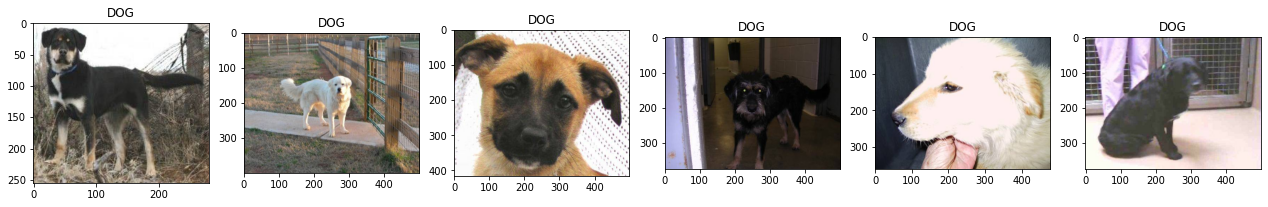

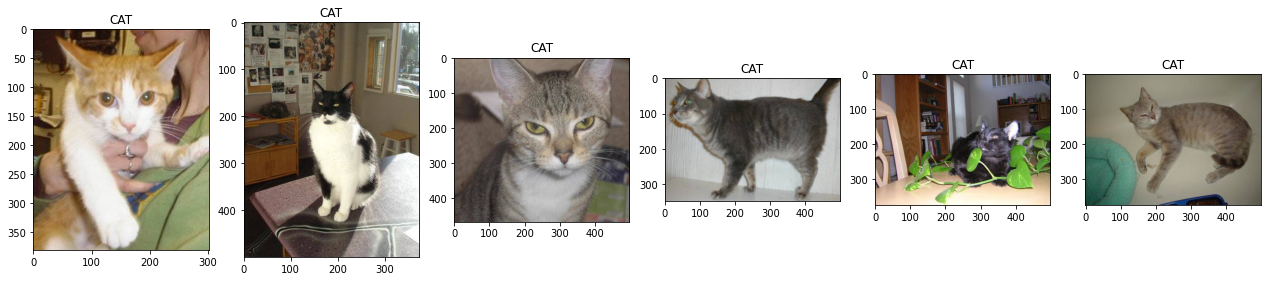

In [10]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

def show_grid_images(image_path_list, ncols=8, augmentor=None, title=None):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        axs[i].imshow(image)
        axs[i].set_title(title)

dog_image_list = df[df['label'] == 'DOG']['path'].iloc[:6].tolist()
show_grid_images(dog_image_list, ncols=6, title='DOG')

cat_image_list = df[df['label'] == 'CAT']['path'].iloc[:6].tolist()
show_grid_images(cat_image_list, ncols=6, title='CAT')

In [11]:
for image_path in dog_image_list:
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    print('image shape: ', image.shape)

# height, width, channel

print('image height shape: ', image[:, 0, 0].shape)

print('image width shape: ', image[0, :, 0].shape)

print('image size: ', image[:, :, 0].shape)

image shape:  (255, 280, 3)
image shape:  (399, 500, 3)
image shape:  (416, 500, 3)
image shape:  (374, 500, 3)
image shape:  (360, 479, 3)
image shape:  (374, 500, 3)
image height shape:  (374,)
image width shape:  (500,)
image size:  (374, 500)


### ImageDataGenerator 객체와 flow_from_directory()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    horizontal_flip = True,
    rescale=1/255.0
)
train_flow_gen = train_gen.flow_from_directory(
    # image파일이 있는 디렉토리(구조를 꼭 맞춰주어야함)
    directory='/content/drive/MyDrive/focus/Study_For_DeepLearning/data/training_set',
    target_size=(224, 224) #원본 이미지를 최종 resize 할 image size
    ,class_mode='categorical' # flow에서 OHE 작업까지 해야함!
    ,batch_size=64
)

Found 8005 images belonging to 2 classes.


In [13]:
images_array, labels_array = next(train_flow_gen)
print(images_array.shape, labels_array.shape)

(64, 224, 224, 3) (64, 2)


In [14]:
images_array = next(train_flow_gen)[0]
labels_array = next(train_flow_gen)[1]
print('##### image array shape:', images_array.shape)
print('#### label array shape:', labels_array.shape)

##### image array shape: (64, 224, 224, 3)
#### label array shape: (64, 2)


### Model 생성
- Input의 shape는 VGG16, ResNet, Xception 모델이 원래 학습 이미지 사이즈로 가졌던 224 x 224로 설정.
- 이를 위해, flow_from_directory()로 원본 이미지를 224 x 224로 변환한 것이다.

In [19]:
IMAGE_SIZE = 224
BATCH_SIZE = 256

In [20]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16, ResNet50V2, Xception

def create_model(model_name='vgg16', verbose=False):
    
    clear_session()
    
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', name='fc1')(x)
    # 개와 고양이 2 종류이므로 Dense의 units는 2
    output = Dense(2, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model

In [21]:
model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [22]:
# train 데이터 건수는 generator의 samples 속성을 이용하여 가져올 수 있음. 
train_image_cnt = train_flow_gen.samples 
print(train_image_cnt)
# batch size는 64, 학습 데이터 image 개수는 8005 
model.fit_generator(train_flow_gen, epochs=15, 
                    steps_per_epoch=int(np.ceil(train_image_cnt/BATCH_SIZE))
                   )
                    
# 앞으론 fit()을 사용해야함. (fit_generator()와 같이 동작함)
# model.fit(train_flow_gen, epochs=15, steps_per_epoch=int(np.ceil(train_image_cnt/BATCH_SIZE)))

8005


<ipython-input-22-4caffb41ebf4>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_flow_gen, epochs=15,


Epoch 1/15
32/32 [==============================] - 444s 13s/step - loss: 0.1673 - accuracy: 0.9346
Epoch 2/15
32/32 [==============================] - 291s 9s/step - loss: 0.1370 - accuracy: 0.9527
Epoch 3/15
32/32 [==============================] - 246s 8s/step - loss: 0.1487 - accuracy: 0.9412
Epoch 4/15
32/32 [==============================] - 186s 6s/step - loss: 0.0961 - accuracy: 0.9623
Epoch 5/15
32/32 [==============================] - 144s 4s/step - loss: 0.0855 - accuracy: 0.9688
Epoch 6/15
32/32 [==============================] - 103s 3s/step - loss: 0.0565 - accuracy: 0.9780
Epoch 7/15
32/32 [==============================] - 82s 3s/step - loss: 0.0576 - accuracy: 0.9771
Epoch 8/15
32/32 [==============================] - 61s 2s/step - loss: 0.0391 - accuracy: 0.9873
Epoch 9/15
32/32 [==============================] - 51s 2s/step - loss: 0.0390 - accuracy: 0.9868
Epoch 10/15
32/32 [==============================] - 37s 1s/step - loss: 0.0355 - accuracy: 0.9894
Epoch 11/15


In [24]:
# test data는 augmentation을 적용할 필요 없음. 
test_gen = ImageDataGenerator(rescale=1/255.)
test_flow_gen = test_gen.flow_from_directory(directory='/content/drive/MyDrive/focus/Study_For_DeepLearning/data/test_set' # image file이 있는 디렉토리 
                                                         ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
                                                         ,class_mode='categorical' # 문자열 label을 자동으로 one-hot encoding 시켜줌. 
                                                         ,batch_size=BATCH_SIZE, shuffle=False
                                                         )

Found 2023 images belonging to 2 classes.


In [ ]:
# 모델의 evaluate_generator()를 호출하여 Test 데이터의 성능 측정.(evaluate()도 무방)
model.evaluate_generator(test_flow_gen)

- [0.13835684955120087, 0.9703410863876343] (캐글노트북에서 실행한 결과)

### ImageDataGnerator 객체와 flow_from_dataframe()

In [28]:
pd.set_option('display.max_colwidth', 200)

print(df['dataset'].value_counts())

train    8005
test     2023
Name: dataset, dtype: int64


### 학습용/검증용/테스트용 DataFrame 생성

In [29]:
train_df = df[df['dataset']=='train']
test_df = df[df['dataset']=='test']
print('train_df shape:', train_df.shape, 'test_df shape:', test_df.shape)

train_df shape: (8005, 3) test_df shape: (2023, 3)


In [30]:
from sklearn.model_selection import train_test_split


# stratify를 이용하여 label 값을 균등하게 분할 
tr_df, val_df = train_test_split(train_df, test_size=0.15, stratify=train_df['label'], random_state=2023)
print('tr_df shape:', tr_df.shape, 'val_df shape:', val_df.shape)
print('tr_df label distribution:\n', tr_df['label'].value_counts())
print('val_df label distributuion:\n', val_df['label'].value_counts())

tr_df shape: (6804, 3) val_df shape: (1201, 3)
tr_df label distribution:
 DOG    3404
CAT    3400
Name: label, dtype: int64
val_df label distributuion:
 DOG    601
CAT    600
Name: label, dtype: int64


### 학습과 검증용 ImageDataGenerator 생성

In [31]:
# IMAGE 크기와 BATCH 크기를 위한 환경 변수 설정. 
IMAGE_SIZE = 224
BATCH_SIZE = 64 # 64로 할려고 했으나 너무 오래 걸림

In [32]:
# 학습용과 검증용 ImageDataGenerator 생성. 학습용은 augmentation + rescale적용. 검증용은 rescale만 적용 
# augmentation은 horizontal_flip(좌우 반전)만 적용하고 0 ~ 255의 pixel값을 0 ~ 1 로 scale만 적용. 
tr_generator = ImageDataGenerator(horizontal_flip=True, rescale=1/255.)

# ImageDataGenerator 객체의 flow_from_dataframe()) 메소드를 호출. 
# flow_from_dataframe()은 인자로 dataframe = 메타 데이터용 DataFrame 입력 받음. 
# x_col은 메타 데이터용 DataFrame에서 image 파일의 절대경로 위치를 나타내는 column명을 의미
# y_col은 메타 데이터용 DataFrame에서 label값 column명을 의미. 이 때 y_col로 지정된 컬럼은 반드시 문자열(object type)이 되어야 함. 
# y_col의 경우 미리 encoding(label 또는 원핫)을 해서 숫자값으로 절대 변경하면 안됨.  
# softmax가 아닌 sigmoid로 최종 출력하므로 class_mode='binary' 로 Label 데이터 변환, 이미지 array는 224 x 224 로 변경. Batch 크기는 64로 설정. 
tr_flow_gen = tr_generator.flow_from_dataframe(dataframe=tr_df # image file이 있는 디렉토리
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
                                      ,class_mode='binary' # 문자열 label을 자동 Encoding. 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=True
                                      )

Found 6804 validated image filenames belonging to 2 classes.


In [33]:
images_array = next(tr_flow_gen)[0]
labels_array = next(tr_flow_gen)[1]
print('##### image array shape:', images_array.shape)
print('#### label array shape:', labels_array.shape)
print(images_array[0])
print(labels_array[0])

##### image array shape: (64, 224, 224, 3)
#### label array shape: (64,)
[[[0.4666667  0.46274513 0.44705886]
  [0.4666667  0.46274513 0.44705886]
  [0.4666667  0.46274513 0.44705886]
  ...
  [0.06666667 0.04705883 0.03529412]
  [0.05490196 0.03529412 0.02352941]
  [0.05490196 0.03529412 0.02352941]]

 [[0.4666667  0.46274513 0.44705886]
  [0.4666667  0.46274513 0.44705886]
  [0.4666667  0.46274513 0.44705886]
  ...
  [0.07058824 0.0509804  0.03921569]
  [0.07058824 0.0509804  0.03921569]
  [0.07058824 0.0509804  0.03921569]]

 [[0.4666667  0.46274513 0.44705886]
  [0.4666667  0.46274513 0.44705886]
  [0.4666667  0.46274513 0.44705886]
  ...
  [0.07450981 0.05490196 0.04313726]
  [0.0627451  0.04313726 0.03137255]
  [0.0627451  0.04313726 0.03137255]]

 ...

 [[0.6627451  0.41960788 0.46274513]
  [0.61960787 0.42352945 0.45882356]
  [0.6        0.48627454 0.49411768]
  ...
  [0.62352943 0.6431373  0.61960787]
  [0.6        0.61960787 0.59607846]
  [0.6        0.61960787 0.59607846]]

 

### 검증용 ImageDataGenerator 생성과 Data generator 처리

In [34]:
# 검증용 ImageDataGenerator는 rescale만 적용. 
val_generator = ImageDataGenerator(rescale=1/255.)
val_flow_gen = val_generator.flow_from_dataframe(dataframe=val_df # image file이 있는 디렉토리
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
                                      ,class_mode='binary' # 문자열 label을 자동으로 one-hot encoding 시켜줌. 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=False
                                      )

Found 1201 validated image filenames belonging to 2 classes.


In [35]:
def create_model(model_name='vgg16', verbose=False):
    
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', name='fc1')(x)
    # 최종 output 출력을 softmax에서 sigmoid로 변환. 
    output = Dense(1, activation='sigmoid', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model

In [36]:
model = create_model(model_name='xception')
# 최종 output 출력을 softmax에서 sigmoid로 변환되었으므로 binary_crossentropy로 변환 
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 3번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
# 5번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

### fit() 호출하여 학습 수행

In [37]:
# 학습과 검증용 steps_per_epoch 계산 
N_EPOCHS = 15

model.fit(tr_flow_gen, epochs=N_EPOCHS,
          steps_per_epoch=int(np.ceil(tr_df.shape[0]/BATCH_SIZE)),
          validation_data=val_flow_gen, 
          validation_steps=int(np.ceil(val_df.shape[0]/BATCH_SIZE)), 
          callbacks=[rlr_cb, ely_cb])

Epoch 1/15
107/107 [==============================] - 79s 507ms/step - loss: 0.1196 - accuracy: 0.9569 - val_loss: 0.7229 - val_accuracy: 0.9309 - lr: 0.0010
Epoch 2/15
107/107 [==============================] - 35s 328ms/step - loss: 0.0792 - accuracy: 0.9730 - val_loss: 0.1584 - val_accuracy: 0.9667 - lr: 0.0010
Epoch 3/15
107/107 [==============================] - 35s 327ms/step - loss: 0.0456 - accuracy: 0.9843 - val_loss: 0.0704 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 4/15
107/107 [==============================] - 35s 327ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.3223 - val_accuracy: 0.9417 - lr: 0.0010
Epoch 5/15
107/107 [==============================] - 35s 326ms/step - loss: 0.0323 - accuracy: 0.9903 - val_loss: 0.1238 - val_accuracy: 0.9650 - lr: 0.0010
Epoch 6/15
107/107 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 0.9909
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
107/107 [============================

### 테스트용 ImageDataGenerator 생성과 Data generator처리 후 Evaluation 수행

In [38]:
# test data는 augmentation을 적용할 필요 없음. 
test_generator = ImageDataGenerator(rescale=1/255.)
test_flow_gen = test_generator.flow_from_dataframe(dataframe=test_df # image file이 있는 디렉토리
                                      ,x_col='path'
                                      ,y_col='label'
                                      ,target_size=(IMAGE_SIZE, IMAGE_SIZE) # 원본 이미지를 최종 resize할 image size
                                      ,class_mode='binary' # 문자열 label을 자동으로 encoding. 
                                      ,batch_size=BATCH_SIZE
                                      ,shuffle=False
                                      )
# evaluation으로 성능 검증
model.evaluate(test_flow_gen)

Found 2023 validated image filenames belonging to 2 classes.
32/32 [==============================] - 151s 5s/step - loss: 0.0804 - accuracy: 0.9857


[0.08035381138324738, 0.9856648445129395]

In [ ]:
# cd /content/drive/MyDrive/focus/Study_For_DeepLearning

/content/drive/MyDrive/focus/Study_For_DeepLearning


In [ ]:
# !git config --global user.email 'minsubrother@naver.com'
# !git config --global user.name 'HongkyuRyu'

In [ ]:
# !git add catndog.ipynb

In [ ]:
# !git commit -m '코랩연동'
# !git push

[main 843d60d] 코랩연동
 1 file changed, 1 insertion(+)
 create mode 100644 catndog.ipynb
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.08 KiB | 220.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/HongkyuRyu/Study_For_DeepLearning.git
   ae08c48..843d60d  main -> main
